# 🌌 The Hitchiker's Guide to the Galaxy of Reinforcement Learning 🌌


### What is Reinforcement Learning ?

Reinforcement Learning is an area of machine learning that helps someone or _something_ to make decisions that lead to maximizing a given reward. The best way to picture this would be to think of scenario where you are teaching your dog new tricks. You give the dog a treat on succefully following your command, from the dog's perspective it's goal is to recieve the maximum number of treats. So it eventually learns to repeat the behavior that led it to get the most treats. This is the crux of Reinforcement Learning, an **_agent_**  (the dog) learning behaviors that lead to maximizing the rewards it recieves from the **_environment_** (you)


This notebook is intended to be a guide for beginners in Reinforcement Learning (RL). It introduces the basic ideas of RL, how deep learning fits into the world of RL, and most importantly it teaches how to train a deep neural network to balance a stick on a cart 😛 . Here's what you will be seeing : 

### 1. Background
        1. Markov Decision Processes
        2. Returns and Discounted Returns
        3. The policy function
        4. Value functions and Action-Value functions

### 2. Deep Q Learning
        1. Deep Q learning
        2. The Policy Net
        3. The Target Net
        4. Experience Replay Buffers
        5. Exploration vs Exploitation
        6. The Agent
        7. The DQN training algorithm

### 3. Practical DQNs
        1. The Cartpole environment
        2. Weights & Biases and Why it's Awesome
        3. Training the DQNs
        
### 4. Extending DQNs beyond CartPole
        1. The Breakout environment
        2. Training on the breakout environment

# Background


## Markov Decision Processes

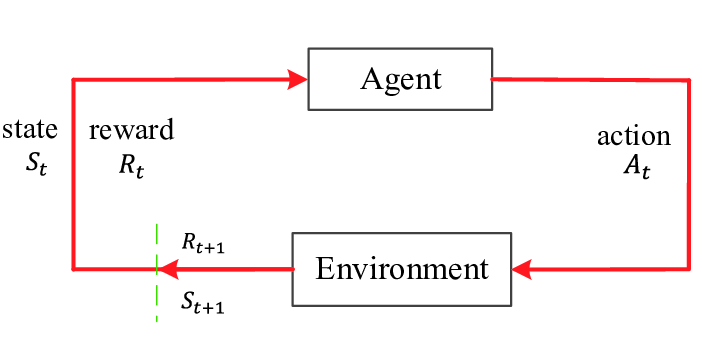

Markov Decision Processes are a framework to mathematically define how our agent interacts with it's environment.
Here, we assume that our _agent_ interacts with our _environment_ in a sequential manner over time. At every timestep ($t$), the _agent_ recieves a representation of the _environment's_ state ($S_t$). The agent then proceeds to interact with the _environment_ through an _action_ ($A_t$). The _environment_ then proceeds to transition to it's next state ($S_{t+1}$) granting the _agent_ a reward ($R_{t+1}$). This process repeats it self for the next time step ($t+1$).

We can think of the reward giving process as an arbitrary function ($f$) that maps a state ($S_t$), and, an action ($A_t$) to a reward ($R_{t+1}$).

$$f(S_t, A_t) = R_{t+1}$$

Let $S$ be the set of all possible states the environment can be in, and, $A$ be the set of all possible actions the agent can take. Assuming both $S$ and $R$ are finite, we can think of $R_t$ and $S_t$ to be random variables, with well defined probabilities that depend on the previous _state-action pair_ ($S_{t-1}, R_{t-1}$). 

## Expected Returns

The goal of our agent is to maximize the cumulative rewards, also called as the expected return. You can picture it as the sum of all future rewards it recieves from any given time step ($t$) till the final time step of the process ($T$). Let's denote this with $G_t$
$$G_t = R_t + R_{t+1} +  R_{t+2} ... R_{T}$$
$$G_t = \sum_{k=t}^{T} R_k$$

When a process has a final time step $T$, it naturally can be broken down into finite subsequences called _episodes_. For example, a game of pong has multiple rounds. Each round can be thought of as an _episode_ with the final time step happening when one player loses the round. However, not all tasks have final timesteps. For example, a factory robot painting cars. These kind of tasks are called continuing tasks, make our definition of expected return obselete as it grows to become $\infty$ because $T=\infty$.

We can however create a new definition of expected return by _discounting_ the future rewards. We can progressively weigh future lower and lower so our expected return stays finite. We call this weighing term _discount rate_ denoted by ($\gamma$). The expected return is now called _discounted return_ and our agent's goal is to maximize this.

$$G_t = R_t + \gamma R_{t+1} +  \gamma^{2} R_{t+2} ... $$
$$G_t = \sum_{k=0}^{\infty} \gamma^k R_{t+k+1}$$
$$G_t = R_t + \gamma G_{t+1}$$

The key takeway from the idea of the discounted return is that our agent now cares more about the immediate rewards than it does about the future rewards. This term helps us choose the trade off between short term rewards and long term rewards.

## The Policy Function

A policy function maps the probability of our agent picking a certain action ($a$), given it has observed a state ($s$) to a probabilty distribution. We can donate this by $\pi$. Following a policy $\pi$ means picking the action that yields the maximum probability. The optimal policy function always yeilds the highest probabilty to the action that yields the maximum discounted return. We can denote the optimal policy using $\pi^{*}$ 

## Value functions and Value-Action Functions

Value and Value-Action functions are functions that map the expected discounted return of a state or a state-action pair. What this means intuitively is that a value / value-action can tell the agent how good a specific state or state action pair is from the agent's perspective were it to follow a policy $\pi$.

Mathematically, the value function of a state ($s$) under a policy $\pi$ can be defined as follows
$$V_{\pi}(s) = E[G_t | s]$$
$$V_{\pi}(s) = E[\sum_{k=0}^{\infty} \gamma^k R_{t+k+1}$ | S_t = s]$$

Similarly, Value-Action function, often called as the **Q-value** function can be defined as follows
$$Q_{\pi}(s, a) = E[G_t | s]$$
$$Q_{\pi}(s, a) = E[\sum_{k=0}^{\infty} \gamma^k R_{t+k+1}| S_t = s, A_t = a]$$

The goal of reinforcement learning is to estimate these value functions, inorder to determine the best actions the agent can take.

## Deep Q Learning

Recall that the optimal policy ($\pi^{*}$) always assigns the highest probability to the action that yields the best expected discounted returns. So, any other policy ($\pi$) can said to be optimal if and only if it yeilds better discounted returns for all states.

$$\pi \geq \pi^{*} \text{      if and only if     } v_{\pi}(s) \geq v_{\pi^{*}}(s) \forall s \epsilon S$$

We know that the goal of Reinforcement Learning is to estimate the value functions. What is best way to approximate a function ? Neural Nets !. This is where Deep Learning fits in the realm of Reinforcement Learning.

Only the optimal q function similarly returns the largest q value for all state action pairs.Therefore, it follows something called the **Bellman Optimality Equation**

$$ Q_{*}(s, a) = E[ R_{t+1} + \gamma \max_{a'}Q_{*}(s', a') ] $$

What this means is that the optimal q value for any state-action pair is the expectation of the reward recieved from the said state-action pair plus the optimal Q value achieved from any possible next state-action pairs.

For any Q function $Q(s, a)$ to become the optimal Q function $Q_{*}(s, a)$, it has to follow the Bellman equation as well. Our neural network might not do so at the beginning, so all we have to do is minimize the loss between the Q-value it should be returning were it to follow the bellman optimality equation vs the value it actually returns.   
$$loss = MSE|Q(s, a) -  (R_{t+1} + \gamma \max_{a'}Q(s', a'))|$$

In [16]:
%matplotlib inline
import os
import gym
import math
import random
import time
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from collections import namedtuple
from itertools import count
from PIL import Image
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
import torchvision.transforms as T

In [13]:
class CartPoleEnvManager():
    def __init__(self, device):
        self.device = device
        self.env    = gym.make('CartPole-v0').unwrapped
        self.env.reset()
        self.current_screen = None
        self.done           = False
    
    def reset(self):
        self.env.reset()
        self.current_screen = None
        
    def close(self):
        self.env.close()
        
    def render(self, mode='human'):
        return self.env.render(mode)
        
    def num_actions_available(self):
        return self.env.action_space.n
        
    def take_action(self, action):        
        _, reward, self.done, _ = self.env.step(action.item())
        return torch.tensor([reward], device=self.device)
    
    def just_starting(self):
        return self.current_screen is None
    
    def get_state(self):
        if self.just_starting() or self.done:
            self.current_screen = self.get_processed_screen()
            black_screen        = torch.zeros_like(self.current_screen)
            return black_screen
        else:
            s1 = self.current_screen
            s2 = self.get_processed_screen()
            self.current_screen = s2
            return s2 - s1
    
    def get_screen_height(self):
        screen = self.get_processed_screen()
        return screen.shape[2]
    
    def get_screen_width(self):
        screen = self.get_processed_screen()
        return screen.shape[3]
       
    def get_processed_screen(self):
        screen = self.render('rgb_array').transpose((2, 0, 1)) # PyTorch expects CHW
        screen = self.crop_screen(screen)
        return self.transform_screen_data(screen)
    
    def crop_screen(self, screen):
        screen_height = screen.shape[1]
        
        # Strip off top and bottom
        top    = int(screen_height * 0.4)
        bottom = int(screen_height * 0.8)
        screen = screen[:, top:bottom, :]
        return screen
    
    def transform_screen_data(self, screen):       
        # Convert to float, rescale, convert to tensor
        screen = np.ascontiguousarray(screen, dtype=np.float32) / 255
        screen = torch.from_numpy(screen)
        
        # Use torchvision package to compose image transforms
        resize = T.Compose([
            T.ToPILImage(),
            T.Resize((40,90)),
            T.ToTensor()
        ])
        
        return resize(screen).unsqueeze(0).to(self.device) # add a batch dimension (BCHW)

In [7]:
class Agent():
    def __init__(self, strategy, num_actions, device):
        self.current_step = 0
        self.strategy = strategy
        self.num_actions = num_actions
        self.device = device

    def select_action(self, state, policy_net):
        
        rate = strategy.get_exploration_rate(self.current_step)
        self.current_step += 1
        if rate > random.random():
            action = random.randrange(self.num_actions)
            return torch.tensor([action]).to(self.device) # explore      
        else:
            with torch.no_grad():
                return policy_net(state).argmax(dim=1).to(self.device) # exploit
    
    def test_agent(self, em, policy_net):
        em.reset()
        state = em.get_state()
        frames = [em.render('rgb_array')]
        total_reward = 0

        for timestep in count():
            action = policy_net(state).argmax(dim=1)
            reward = em.take_action(action)
            state = em.get_state()
            frames.append(em.render('rgb_array'))
            total_reward += reward.item()
            if em.done or timestep > 1500:
                break

        em.close()
        
        return np.array(frames).transpose(0, 3, 1, 2), total_reward

In [2]:
class CartPoleDQN(nn.Module):
    def __init__(self, img_height, img_width):
        super().__init__()
         
        self.fc1 = nn.Linear(in_features=img_height*img_width*3, out_features=24)   
        self.fc2 = nn.Linear(in_features=24, out_features=32)
        self.out = nn.Linear(in_features=32, out_features=2)            

    def forward(self, t):
        t = t.flatten(start_dim=1)
        t = F.relu(self.fc1(t))
        t = F.relu(self.fc2(t))
        t = self.out(t)
        return t

In [3]:
Experience = namedtuple(
    'Experience',
    ('state', 'action', 'next_state', 'reward', 'terminal')
)

In [5]:
class ReplayMemory():
    def __init__(self, capacity):
        self.capacity = capacity
        self.memory = []
        self.push_count = 0
        
    def push(self, experience):
        if len(self.memory) < self.capacity:
            self.memory.append(experience)
        else:
            self.memory[self.push_count % self.capacity] = experience
        self.push_count += 1

    def sample(self, batch_size):
        return random.sample(self.memory, batch_size)
    
    def can_provide_sample(self, batch_size):
        return len(self.memory) >= batch_size

In [6]:
class EpsilonGreedyStrategy():
    def __init__(self, start, end, decay):
        self.start = start
        self.end = end
        self.decay = decay
    
    def get_exploration_rate(self, current_step):
        return self.end + (self.start - self.end) * \
            math.exp(-1. * current_step * self.decay)

### Tensor processing

In [9]:
def extract_tensors(experiences, device):
    # Convert batch of Experiences to Experience of batches
    batch = Experience(*zip(*experiences))
    
    if torch.is_tensor(batch.state[0]):
        t1 = torch.cat(batch.state).to(device)
        t4 = torch.cat(batch.next_state).to(device)
    else:
        t1 = np.array([np.array(st).transpose(2, 0, 1) for st in batch.state])
        t1 = torch.from_numpy(t1).to(device) / 255
        t4 = np.array([np.array(st).transpose(2, 0, 1) for st in batch.next_state])
        t4 = torch.from_numpy(t4).to(device) / 255
    
    
    t2 = torch.cat(batch.action).to(device)
    t3 = torch.cat(batch.reward).to(device)
    t5 = torch.cat(batch.terminal).to(device)
    
    return (t1,t2,t3,t4,t5)

#### Example of Experience(\*zip(\*experiences)) used above
See https://stackoverflow.com/a/19343/3343043 for further explanation.

In [10]:
e1 = Experience(1,1,1,1,1)
e2 = Experience(2,2,2,2,1)
e3 = Experience(3,3,3,3,1)

experiences = [e1,e2,e3]
experiences

[Experience(state=1, action=1, next_state=1, reward=1, terminal=1),
 Experience(state=2, action=2, next_state=2, reward=2, terminal=1),
 Experience(state=3, action=3, next_state=3, reward=3, terminal=1)]

In [11]:
batch = Experience(*zip(*experiences))
batch

Experience(state=(1, 2, 3), action=(1, 2, 3), next_state=(1, 2, 3), reward=(1, 2, 3), terminal=(1, 1, 1))

### Q-Value Calculator

In [12]:
class QValues():
    
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    
    @staticmethod
    def get_current(policy_net, states, actions):
        return policy_net(states).gather(dim=1, index=actions.unsqueeze(-1))
    
    @staticmethod        
    def get_next(target_net, next_states, terminal):
        with torch.no_grad():
            non_final_states  = next_states[~terminal] # get all non terminal states
            batch_size        = next_states.shape[0]   # get the batch size
            values            = torch.zeros(batch_size).to(device) # create a zero value tensor 
            values[~terminal] = target_net(non_final_states).max(dim=1)[0].detach() # replace zeros with Q values 

        return values

In [13]:
import wandb

# login to weights and biases
wandb.login()
os.environ['WANDB_NOTEBOOK_NAME'] = 'DeepQLearning.ipynb' # set the name of the notebook

# set up the run configuration
config = dict(
    batch_size         = 256,
    eps_start          = 1,
    eps_end            = 0.01,
    eps_decay          = 0.001,
    gamma              = 0.999,
    learning_rate      = 0.001,
    episodes           = 10000,
    sync_time          = 10, 
    replay_buffer_size = 1000000,
    loss_fn            = 'Huber',
    warm_start         = 50000,
    max_test_length    = 1500,
    fps                = 24,
    test_freq          = 10,
    save_freq          = 100,
    learn_start        = 0
)

# initialize wandb
run             = wandb.init(project='Hitchiker-s-Guide-to-the-Galaxy-of-Reinforcement-Learning', config=config)
artifact        = wandb.Artifact('policy_net', type='model')
device          = torch.device("cuda" if torch.cuda.is_available() else "cpu")

run_videos      = os.path.join((str(run.name)))
run_checkpoints = os.path.join(run_videos, 'ckpt')


if not os.path.isdir(run_checkpoints):
    os.makedirs(run_checkpoints)

wandb: Currently logged in as: peacekurella (use `wandb login --relogin` to force relogin)


## Main Program

In [ ]:
device   = torch.device("cuda" if torch.cuda.is_available() else "cpu")
em       = CartPoleEnvManager(device)
tem      = CartPoleEnvManager(device)
strategy = EpsilonGreedyStrategy(config['eps_start'], config['eps_end'], config['eps_decay'])
agent    = Agent(strategy, em.num_actions_available(), device)
memory   = ReplayMemory(config['replay_buffer_size'])

policy_net = CartPoleDQN(em.get_screen_height(), em.get_screen_width()).to(device)
target_net = CartPoleDQN(em.get_screen_height(), em.get_screen_width()).to(device)
target_net.load_state_dict(policy_net.state_dict())
target_net.eval()

optimizer = optim.Adam(params=policy_net.parameters(), lr=config['learning_rate'])
loss_fn   = nn.SmoothL1Loss(reduction='mean')

for episode in range(config['episodes']):
    
    em.reset()
    state          = em.get_state()
    episode_reward = 0
    episode_loss   = []
    
    for timestep in count():
        
        action = agent.select_action(state, policy_net)
        reward = em.take_action(action)
        next_state = em.get_state()
        memory.push(Experience(state, action, next_state, reward, torch.tensor([em.done])))
        state = next_state
        episode_reward += reward.item()
        
        if memory.can_provide_sample(config['warm_start']) and timestep > config['learn_start']:
            
            experiences = memory.sample(config['batch_size'])
            states, actions, rewards, next_states, terminal = extract_tensors(experiences, device)
            
            current_q_values = QValues.get_current(policy_net, states, actions)
            next_q_values = QValues.get_next(target_net, next_states, terminal)
            target_q_values = (next_q_values * config['gamma']) + rewards
            loss = loss_fn(current_q_values, target_q_values.unsqueeze(1).float())
            episode_loss += [loss.detach().item()]
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
            
            
        if em.done:
            run.log({
                'Train/EpisodeReward' : episode_reward,
                'Train/EpisodeDuration': timestep,
                'Train/EpisodeLoss': sum(episode_loss) / len(episode_loss)
            }, step = episode)
            break

    if episode % config['sync_time'] == 0:
        target_net.load_state_dict(policy_net.state_dict())
    
    # periodically test the model and save the episode videos
    if episode % config['test_freq'] == 0:

        # test the agent
        frames, total_reward = agent.test_agent(tem, policy_net)

        # expects the video to be of shape (t, c, h, w)
        video = wandb.Video(
            frames,
            fps=config['fps'],
            caption = str(episode),
            format='mp4'
        )
        
        # log the video and reward
        run.log({
            'Test/Video' : video,
            'Test/EpisodeDuration': len(frames),
            'Test/EpisodeReward': total_reward
        }, step = episode)

    # periodically save the model weights
    if episode % config['save_freq'] == 0:

        # save locally for back up
        torch.save(policy_net.state_dict(), os.path.join(run_checkpoints, str(episode)))

        # use wandb artifact to save the model
        artifact.add_file(os.path.join(run_checkpoints, str(episode)))

        
# close the environment
run.log_artifact(artifact)
run.join()        
em.close()

In [14]:
try:
    from stable_baselines.common.atari_wrappers import wrap_deepmind
except:
    from stable_baselines.common.atari_wrappers import wrap_deepmind

In [17]:
class BreakoutEnvManager(CartPoleEnvManager):
    
    def __init__(self, device):
        self.device = device
        self.env = gym.make('BreakoutDeterministic-v4')
        self.env = wrap_deepmind(self.env, frame_stack = True)
        self.reset()
        self.done = False
    
    def reset(self):
        self.current_state = self.env.reset()
        
    def take_action(self, action):        
        self.current_state, reward, self.done, info = self.env.step(action.item())
        if self.done: 
            reward = -1
            if info['ale.lives'] > 0:
                self.done = False
        
        return torch.tensor([reward], device=self.device)
    
    def get_state(self):
        return self.current_state # lazy array (84, 84, 4), only convert to tensor before passing to model
    
    def get_screen_height(self):
        return 84
    
    def get_screen_width(self):
        return 84